In [ ]:
!pip install tfx
# !pip install shapely<2.0.0
!pip install shapely==1.7.1
!pip install tensorflow-model-analysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.6/206.6 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for shapely: filename=Shapely-1.7.1-cp310-cp310-linux_x86_64.whl size=997339 sha256=2377a4a8773cdc70dcbb7cc8c56ff1f61ce44ef0593d95e156e576938f166b9f
  Stored in directory: /root/.cache/pip/wheels/2e/fa/97/c85f587c35afcaf4a81c481741d36592518d1e50445572f0d4
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: shapely 2.0.2
    Uninstalling shapely-2.0.2:
      Successfully uninstalled shapely-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import tensorflow as tf
from tfx import v1 as tfx

# TFX libraries
import tensorflow_data_validation as tfdv
import tensorflow_transform as tft
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext

# For performing feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# For feature visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Utilities
from tensorflow.python.lib.io import file_io
from tensorflow_metadata.proto.v0 import schema_pb2
from google.protobuf.json_format import MessageToDict
from  tfx.proto import example_gen_pb2
from tfx.types import standard_artifacts
from tensorflow_transform.tf_metadata import dataset_metadata, schema_utils
import tensorflow_transform.beam as tft_beam
import os
import pprint
import tempfile
import pandas as pd



In [ ]:
data_df = pd.read_csv("TRAIN.csv")

In [ ]:
list(data_df.columns)

['Customer ID',
 'network_age',
 'Customer tenure in month',
 'Total Spend in Months 1 and 2 of 2017',
 'Total SMS Spend',
 'Total Data Spend',
 'Total Data Consumption',
 'Total Unique Calls',
 'Total Onnet spend ',
 'Total Offnet spend',
 'Total Call centre complaint calls',
 'Network type subscription in Month 1',
 'Network type subscription in Month 2',
 'Most Loved Competitor network in in Month 1',
 'Most Loved Competitor network in in Month 2',
 'Churn Status']

In [ ]:
## notice the "Most 'Most Loved Competitor network in in Month 1" and 'Most Loved Competitor network in in Month 2"
## i will remove one "in"

new_column_names = {"Most Loved Competitor network in in Month 1": "Most Loved Competitor network in Month 1",
                    "Most Loved Competitor network in in Month 2": "Most Loved Competitor network in Month 2"}

data_df.rename(columns=new_column_names, inplace=True)
## dataframes named with spaces irks me. i suppose its from it not looking like proper variables in classical programmming.
## i will rename name here
data_df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [ ]:
list(data_df.columns)

['Customer_ID',
 'network_age',
 'Customer_tenure_in_month',
 'Total_Spend_in_Months_1_and_2_of_2017',
 'Total_SMS_Spend',
 'Total_Data_Spend',
 'Total_Data_Consumption',
 'Total_Unique_Calls',
 'Total_Onnet_spend_',
 'Total_Offnet_spend',
 'Total_Call_centre_complaint_calls',
 'Network_type_subscription_in_Month_1',
 'Network_type_subscription_in_Month_2',
 'Most_Loved_Competitor_network_in_Month_1',
 'Most_Loved_Competitor_network_in_Month_2',
 'Churn_Status']

In [ ]:
data_df.isna().sum()

Customer_ID                                   0
network_age                                   0
Customer_tenure_in_month                      0
Total_Spend_in_Months_1_and_2_of_2017         0
Total_SMS_Spend                               0
Total_Data_Spend                              0
Total_Data_Consumption                        0
Total_Unique_Calls                            0
Total_Onnet_spend_                            0
Total_Offnet_spend                            0
Total_Call_centre_complaint_calls             0
Network_type_subscription_in_Month_1        175
Network_type_subscription_in_Month_2        144
Most_Loved_Competitor_network_in_Month_1      1
Most_Loved_Competitor_network_in_Month_2      1
Churn_Status                                  0
dtype: int64

In [ ]:
data_df["Network_type_subscription_in_Month_1"].fillna('unknown', inplace=True)
data_df["Network_type_subscription_in_Month_2"].fillna('unknown', inplace=True)
data_df.dropna(axis=0, inplace=True)

In [ ]:
data_df.isna().sum()

Customer_ID                                 0
network_age                                 0
Customer_tenure_in_month                    0
Total_Spend_in_Months_1_and_2_of_2017       0
Total_SMS_Spend                             0
Total_Data_Spend                            0
Total_Data_Consumption                      0
Total_Unique_Calls                          0
Total_Onnet_spend_                          0
Total_Offnet_spend                          0
Total_Call_centre_complaint_calls           0
Network_type_subscription_in_Month_1        0
Network_type_subscription_in_Month_2        0
Most_Loved_Competitor_network_in_Month_1    0
Most_Loved_Competitor_network_in_Month_2    0
Churn_Status                                0
dtype: int64

In [ ]:
categorical_features = ["Network_type_subscription_in_Month_1", "Network_type_subscription_in_Month_2", "Most_Loved_Competitor_network_in_Month_1", "Most_Loved_Competitor_network_in_Month_2"]
numerical_features = data_df[[col for col in list(data_df.columns) if col not in categorical_features]]

In [ ]:
# a close look at the  categorical_features unique values:
for col in categorical_features:
  print(f"{col}: {data_df[col].unique()}")

Network_type_subscription_in_Month_1: ['2G' '3G' 'Other' 'unknown']
Network_type_subscription_in_Month_2: ['2G' '3G' 'unknown' 'Other']
Most_Loved_Competitor_network_in_Month_1: ['Uxaa' 'Weematel' '0' 'Zintel' 'Mango' 'ToCall' 'PQza']
Most_Loved_Competitor_network_in_Month_2: ['Mango' 'PQza' 'ToCall' 'Uxaa' 'Weematel' 'Zintel']


In [ ]:
import numpy as np

# "0" is a weird name for a Most_Loved_Competitor_network_in_Month_1 value. i will rename it
data_df['Most_Loved_Competitor_network_in_Month_1'] = np.where(
    data_df['Most_Loved_Competitor_network_in_Month_1'] == '0',
    "unknown", data_df['Most_Loved_Competitor_network_in_Month_1']
)

In [ ]:
# a close look at the  categorical_features unique values:
for col in categorical_features:
  print(f"{col}: {data_df[col].unique()}")

Network_type_subscription_in_Month_1: ['2G' '3G' 'Other' 'unknown']
Network_type_subscription_in_Month_2: ['2G' '3G' 'unknown' 'Other']
Most_Loved_Competitor_network_in_Month_1: ['Uxaa' 'Weematel' 'unknown' 'Zintel' 'Mango' 'ToCall' 'PQza']
Most_Loved_Competitor_network_in_Month_2: ['Mango' 'PQza' 'ToCall' 'Uxaa' 'Weematel' 'Zintel']


<ipython-input-14-c83079c65483>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = numerical_features.corr()


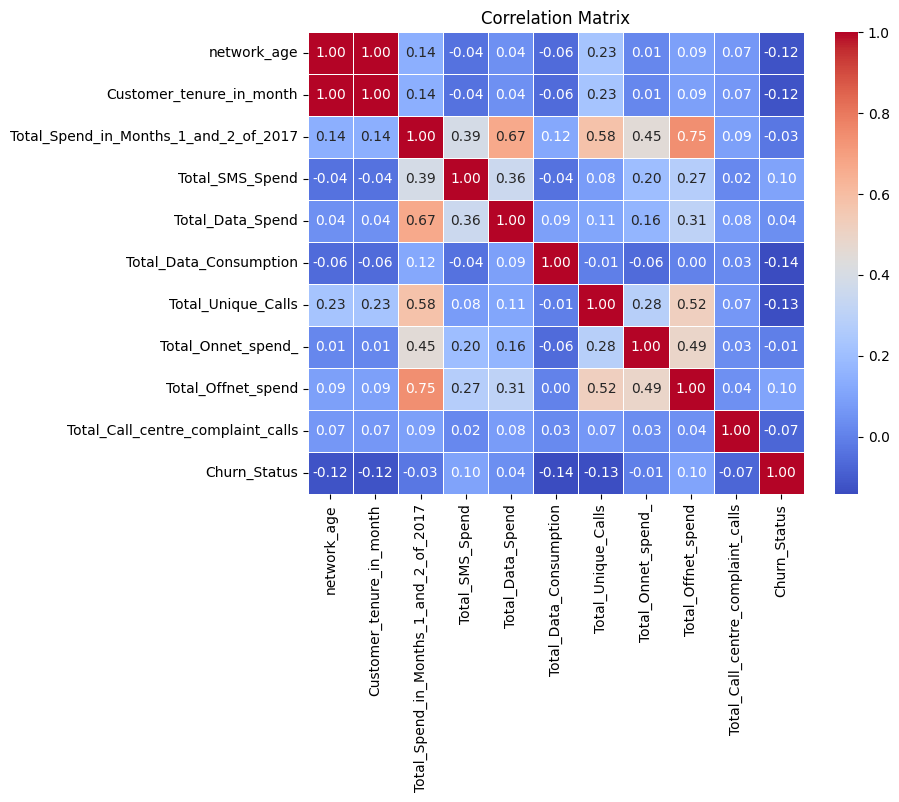

In [ ]:
# Treating the categorical features
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data_df.drop("network_age", axis=1, inplace=True)

In [ ]:
# location of the pipeline metadata store
_pipeline_root = './pipeline/'

# directory of the raw data files
_data_root = './data/cleaned_data'

# path to the raw training data
_data_filepath = os.path.join(_data_root, 'cleaned_data.csv')

In [ ]:
os.makedirs(_pipeline_root, exist_ok=True)
os.makedirs(_data_root, exist_ok=True)

In [ ]:
#updating numerical features
numerical_features = [col for col in list(data_df.columns) if col not in categorical_features]

In [ ]:
data_df.to_csv(f'{_data_root}/cleaned_data.csv')

In [ ]:
from tfx.components import CsvExampleGen

context = InteractiveContext(pipeline_root=_pipeline_root)

# Define the CsvExampleGen component
# example_gen = CsvExampleGen(input_base=_data_root)

# i split into train and eval using 8:2 ratio
example_gen = CsvExampleGen(
    input_base=_data_root,
    output_config=example_gen_pb2.Output(
        split_config=example_gen_pb2.SplitConfig(
            splits=[
                example_gen_pb2.SplitConfig.Split(name='train', hash_buckets=8),
                example_gen_pb2.SplitConfig.Split(name='eval', hash_buckets=2),
            ]
        )
    )
)
context.run(example_gen)

ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 1
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None)

In [ ]:
artifact = example_gen.outputs['examples'].get()[0]

# print split names and uri
print(f'split names: {artifact.split_names}')
print(f'artifact uri: {artifact.uri}')

split names: ["train", "eval"]
artifact uri: ./pipeline/CsvExampleGen/examples/1


In [ ]:
# Get the URI of the output artifact representing the training examples
train_uri = os.path.join(artifact.uri, 'Split-train')

# See the contents of the `train` folder
!ls {train_uri}

data_tfrecord-00000-of-00001.gz


In [ ]:
context.show(example_gen.outputs['examples'])

In [ ]:
# Get the list of files in this directory (all compressed TFRecord files)
tfrecord_filenames = [os.path.join(train_uri, name)
                      for name in os.listdir(train_uri)]

# Create a `TFRecordDataset` to read these files
dataset = tf.data.TFRecordDataset(tfrecord_filenames, compression_type="GZIP")

In [ ]:
# Define a helper function to get individual examples
def get_records(dataset, num_records):
    '''Extracts records from the given dataset.
    Args:
        dataset (TFRecordDataset): dataset saved by ExampleGen
        num_records (int): number of records to preview
    '''

    # initialize an empty list
    records = []

    # Use the `take()` method to specify how many records to get
    for tfrecord in dataset.take(num_records):

        # Get the numpy property of the tensor
        serialized_example = tfrecord.numpy()

        # Initialize a `tf.train.Example()` to read the serialized data
        example = tf.train.Example()

        # Read the example data (output is a protocol buffer message)
        example.ParseFromString(serialized_example)

        # convert the protocol bufffer message to a Python dictionary
        example_dict = (MessageToDict(example))

        # append to the records list
        records.append(example_dict)

    return records

In [ ]:
pp = pprint.PrettyPrinter()

# Get 3 records from the dataset
sample_records = get_records(dataset, 3)

# Print the output
pp.pprint(sample_records)

[{'features': {'feature': {'': {'int64List': {'value': ['0']}},
                           'Churn_Status': {'int64List': {'value': ['0']}},
                           'Customer_ID': {'bytesList': {'value': ['QURGMDAzOQ==']}},
                           'Customer_tenure_in_month': {'floatList': {'value': [4.1]}},
                           'Most_Loved_Competitor_network_in_Month_1': {'bytesList': {'value': ['VXhhYQ==']}},
                           'Most_Loved_Competitor_network_in_Month_2': {'bytesList': {'value': ['TWFuZ28=']}},
                           'Network_type_subscription_in_Month_1': {'bytesList': {'value': ['Mkc=']}},
                           'Network_type_subscription_in_Month_2': {'bytesList': {'value': ['Mkc=']}},
                           'Total_Call_centre_complaint_calls': {'int64List': {'value': ['2']}},
                           'Total_Data_Consumption': {'floatList': {'value': [1.4951]}},
                           'Total_Data_Spend': {'floatList': {'value': [

In [ ]:
# Instantiate StatisticsGen with the ExampleGen ingested dataset
statistics_gen = tfx.components.StatisticsGen(
    examples=example_gen.outputs['examples'])

# Execute the component
context.run(statistics_gen)

ExecutionResult(
    component_id: StatisticsGen
    execution_id: 2
    outputs:
        statistics: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=StatisticsGen, output_key=statistics, additional_properties={}, additional_custom_properties={}, _input_trigger=None)

In [ ]:
# Show the output statistics
context.show(statistics_gen.outputs['statistics'])

In [ ]:
# Instantiate SchemaGen with the StatisticsGen ingested dataset
schema_gen = tfx.components.SchemaGen(
    statistics=statistics_gen.outputs['statistics'],
    )

# Run the component
context.run(schema_gen)

ExecutionResult(
    component_id: SchemaGen
    execution_id: 3
    outputs:
        schema: OutputChannel(artifact_type=Schema, producer_component_id=SchemaGen, output_key=schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None)

In [ ]:
# Visualize the schema
context.show(schema_gen.outputs['schema'])

,Type,Presence,Valency,Domain
Feature name,,,,
'',INT,required,,-
'Churn_Status',INT,required,,-
'Customer_ID',BYTES,required,,-
'Customer_tenure_in_month',FLOAT,required,,-
'Most_Loved_Competitor_network_in_Month_1',STRING,required,,'Most_Loved_Competitor_network_in_Month_1'
'Most_Loved_Competitor_network_in_Month_2',STRING,required,,'Most_Loved_Competitor_network_in_Month_2'
'Network_type_subscription_in_Month_1',STRING,required,,'Network_type_subscription_in_Month_1'
'Network_type_subscription_in_Month_2',STRING,required,,'Network_type_subscription_in_Month_2'
'Total_Call_centre_complaint_calls',INT,required,,-


,Values
Domain,
'Most_Loved_Competitor_network_in_Month_1',"'Mango', 'PQza', 'ToCall', 'Uxaa', 'Weematel', 'Zintel', 'unknown'"
'Most_Loved_Competitor_network_in_Month_2',"'Mango', 'PQza', 'ToCall', 'Uxaa', 'Weematel', 'Zintel'"
'Network_type_subscription_in_Month_1',"'2G', '3G', 'Other', 'unknown'"
'Network_type_subscription_in_Month_2',"'2G', '3G', 'Other', 'unknown'"


In [ ]:
# Instantiate ExampleValidator with the StatisticsGen and SchemaGen ingested data
example_validator = tfx.components.ExampleValidator(
    statistics=statistics_gen.outputs['statistics'],
    schema=schema_gen.outputs['schema'])

# Run the component.
context.run(example_validator)

ExecutionResult(
    component_id: ExampleValidator
    execution_id: 4
    outputs:
        anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=ExampleValidator, output_key=anomalies, additional_properties={}, additional_custom_properties={}, _input_trigger=None)

In [ ]:
# Visualize the results
context.show(example_validator.outputs['anomalies'])

In [ ]:
_churn_constants_module_file = 'churn_constants.py'

In [ ]:
%%writefile {_churn_constants_module_file}
# Features with string data types that will be converted to indices
CATEGORICAL_FEATURE_KEYS = ["Network_type_subscription_in_Month_1", "Network_type_subscription_in_Month_2", "Most_Loved_Competitor_network_in_Month_1", "Most_Loved_Competitor_network_in_Month_2"]

# Numerical features that are marked as continuous
NUMERIC_FEATURE_KEYS = ["Customer_tenure_in_month", "Total_Spend_in_Months_1_and_2_of_2017", "Total_SMS_Spend", "Total_Data_Spend", "Total_Data_Consumption", "Total_Unique_Calls", "Total_Onnet_spend_" ,"Total_Offnet_spend", "Total_Call_centre_complaint_calls"]

# Feature that the model will predict
LABEL_KEY = 'Churn_Status'

# Utility function for renaming the feature
def transformed_name(key):
    return key + '_xf'

Writing churn_constants.py


In [ ]:
_churn_transform_module_file = 'churn_transform.py'

In [ ]:
%%writefile {_churn_transform_module_file}

import tensorflow as tf
from tensorflow.feature_column import embedding_column , categorical_column_with_vocabulary_list
import tensorflow_transform as tft
import numpy as np

import churn_constants

# Unpack the contents of the constants module
_NUMERIC_FEATURE_KEYS = churn_constants.NUMERIC_FEATURE_KEYS
_CATEGORICAL_FEATURE_KEYS = churn_constants.CATEGORICAL_FEATURE_KEYS
_LABEL_KEY = churn_constants.LABEL_KEY
_transformed_name = churn_constants.transformed_name
EMBEDDING_DIM = 8


# Define the transformations
def preprocessing_fn(inputs):
    """tf.transform's callback function for preprocessing inputs.
    Args:
        inputs: map from feature keys to raw not-yet-transformed features.
    Returns:
        Map from string feature key to transformed feature operations.
    """
    outputs = {}

    # Scale these features to the range [0,1]
    for key in _NUMERIC_FEATURE_KEYS:
        outputs[_transformed_name(key)] = tft.scale_to_0_1(
            inputs[key])

    small_number = 0.01
    outputs[_transformed_name('Offnet_Over_Onnet')] = tft.scale_to_0_1(
        tf.math.log(tf.cast(inputs['Total_Offnet_spend'], dtype=tf.float32) + small_number) / tf.math.log(tf.cast(inputs['Total_Onnet_spend_'], dtype=tf.float32) + small_number))


    outputs[_transformed_name('SMS_Over_Data')] = tft.scale_to_0_1(
        tf.math.log(inputs['Total_SMS_Spend'] + small_number) / tf.math.log(inputs['Total_Data_Spend'] + small_number))




    # Convert strings to indices in a vocabulary
    for key in _CATEGORICAL_FEATURE_KEYS:
       outputs[_transformed_name(key)] = tft.compute_and_apply_vocabulary(inputs[key])



    # Convert the label strings to an index
    outputs[_transformed_name(_LABEL_KEY)] = tft.compute_and_apply_vocabulary(inputs[_LABEL_KEY])



    #engineering some categorical features
    inputs["consistent_competitor"] = tf.where(inputs['Most_Loved_Competitor_network_in_Month_1'] == inputs['Most_Loved_Competitor_network_in_Month_2'],
    'yes',
    'no')

    #inputs["consistent_competitor"] = 'yes' if inputs['Most_Loved_Competitor_network_in_Month_1'] == inputs['Most_Loved_Competitor_network_in_Month_2'] else 'no'

    #inputs["network_upgrade"] = 'same' if (inputs['Network_type_subscription_in_Month_1'] == '2G' and inputs['Network_type_subscription_in_Month_2'] == '2G') else ('upgrade' if (inputs['Network_type_subscription_in_Month_1'] == '3G' and inputs['Network_type_subscription_in_Month_2'] == '2G') else 'same')

    inputs['Network_Upgrade'] = tf.where(
    (inputs['Network_type_subscription_in_Month_1'] == '2G') & (inputs['Network_type_subscription_in_Month_2'] == '3G'),
    'upgrade',
    tf.where(
        (inputs['Network_type_subscription_in_Month_1'] == '3G') & (inputs['Network_type_subscription_in_Month_2'] == '2G'),
        'downgrade',
        'same'))


    new_categorical_feature_keys = ['consistent_competitor', 'Network_Upgrade']

    for key in new_categorical_feature_keys:
        outputs[_transformed_name(key)] = tft.compute_and_apply_vocabulary(inputs[key])


    return outputs

Writing churn_transform.py


In [ ]:
# Ignore TF warning messages
tf.get_logger().setLevel('ERROR')

# Instantiate the Transform component
transform = tfx.components.Transform(
    examples=example_gen.outputs['examples'],
    schema=schema_gen.outputs['schema'],
    module_file=os.path.abspath(_churn_transform_module_file))

# Run the component
context.run(transform)

ExecutionResult(
    component_id: Transform
    execution_id: 5
    outputs:
        transform_graph: OutputChannel(artifact_type=TransformGraph, producer_component_id=Transform, output_key=transform_graph, additional_properties={}, additional_custom_properties={}, _input_trigger=None
        transformed_examples: OutputChannel(artifact_type=Examples, producer_component_id=Transform, output_key=transformed_examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None
        updated_analyzer_cache: OutputChannel(artifact_type=TransformCache, producer_component_id=Transform, output_key=updated_analyzer_cache, additional_properties={}, additional_custom_properties={}, _input_trigger=None
        pre_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=pre_transform_schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None
        pre_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=pre_transform_stats, additional_properties={}, additional_custom_properties={}, _input_trigger=None
        post_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=post_transform_schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None
        post_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=post_transform_stats, additional_properties={}, additional_custom_properties={}, _input_trigger=None
        post_transform_anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=Transform, output_key=post_transform_anomalies, additional_properties={}, additional_custom_properties={}, _input_trigger=None)

In [ ]:
post_transform_schema_uri= transform.outputs["post_transform_schema"]._artifacts[0].uri
# Write schema path to a text file
with open("transformed_schema_path.txt", "w") as file:
    file.write(post_transform_schema_uri)


In [ ]:
# Get the URI of the output artifact representing the transformed examples
train_uri = os.path.join(transform.outputs['transformed_examples'].get()[0].uri, 'Split-train')

# Get the list of files in this directory (all compressed TFRecord files)
tfrecord_filenames = [os.path.join(train_uri, name)
                      for name in os.listdir(train_uri)]

# Create a `TFRecordDataset` to read these files
transformed_dataset = tf.data.TFRecordDataset(tfrecord_filenames, compression_type="GZIP")
# Get 3 records from the dataset
sample_records_xf = get_records(transformed_dataset, 3)

# Print the output
pp.pprint(sample_records_xf)

[{'features': {'feature': {'Churn_Status_xf': {'int64List': {'value': ['0']}},
                           'Customer_tenure_in_month_xf': {'floatList': {'value': [0.023478309]}},
                           'Most_Loved_Competitor_network_in_Month_1_xf': {'int64List': {'value': ['1']}},
                           'Most_Loved_Competitor_network_in_Month_2_xf': {'int64List': {'value': ['2']}},
                           'Network_Upgrade_xf': {'int64List': {'value': ['0']}},
                           'Network_type_subscription_in_Month_1_xf': {'int64List': {'value': ['1']}},
                           'Network_type_subscription_in_Month_2_xf': {'int64List': {'value': ['1']}},
                           'Offnet_Over_Onnet_xf': {'floatList': {'value': [0.65605]}},
                           'SMS_Over_Data_xf': {'floatList': {'value': [4.2152745e-08]}},
                           'Total_Call_centre_complaint_calls_xf': {'floatList': {'value': [0.020833334]}},
                           'Total_

In [ ]:
post_transform_schema = tfdv.load_schema_text(os.path.join(post_transform_schema_uri, "schema.pbtxt"))

In [ ]:
feature_name = 'Most_Loved_Competitor_network_in_Month_1_xf'

# Get the domain of the feature
feature_domain = tfdv.get_domain(post_transform_schema, feature_name)

print(f"Domain of {feature_name}: {feature_domain}")

# context.show(post_transform_schema)

Domain of Most_Loved_Competitor_network_in_Month_1_xf: is_categorical: true



In [ ]:
tfdv.display_schema(post_transform_schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'Churn_Status_xf',INT,required,,-
'Customer_tenure_in_month_xf',FLOAT,required,,-
'Most_Loved_Competitor_network_in_Month_1_xf',INT,required,,-
'Most_Loved_Competitor_network_in_Month_2_xf',INT,required,,-
'Network_Upgrade_xf',INT,required,,-
'Network_type_subscription_in_Month_1_xf',INT,required,,-
'Network_type_subscription_in_Month_2_xf',INT,required,,-
'Offnet_Over_Onnet_xf',FLOAT,required,,-
'SMS_Over_Data_xf',FLOAT,required,,-


In [ ]:

# Declare trainer module file
_trainer_module_file = 'trainer.py'


In [ ]:
%%writefile {_trainer_module_file}

from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras


from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2
from tensorflow_transform.tf_metadata import schema_utils

from keras.src.backend import dropout
from keras.src.engine import input_layer
from keras.optimizers import Adam
from pandas.core.arrays import categorical
from keras.layers import Input, Embedding, Concatenate, Dense, Flatten, Dropout, LeakyReLU
from keras.models import Model
import tensorflow_data_validation as tfdv
import os

CATEGORICAL_FEATURE_KEYS = ["Network_type_subscription_in_Month_1_xf", "Network_type_subscription_in_Month_2_xf", "Most_Loved_Competitor_network_in_Month_1_xf", "Most_Loved_Competitor_network_in_Month_2_xf","consistent_competitor_xf",'Network_Upgrade_xf']
NUMERIC_FEATURE_KEYS = ["Customer_tenure_in_month_xf", "Total_Spend_in_Months_1_and_2_of_2017_xf", "Total_SMS_Spend_xf", "Total_Data_Spend_xf", "Total_Data_Consumption_xf", "Total_Unique_Calls_xf", "Total_Onnet_spend__xf" ,"Total_Offnet_spend_xf", "Total_Call_centre_complaint_calls_xf","Offnet_Over_Onnet_xf","SMS_Over_Data_xf"]


_LABEL_KEY = 'Churn_Status_xf'

_TRAIN_BATCH_SIZE = 32
_EVAL_BATCH_SIZE = 16
EPOCH = 10

VOCAB_FEATURE_DICT = {
  'Most_Loved_Competitor_network_in_Month_1_xf':7,
  "Most_Loved_Competitor_network_in_Month_2_xf": 6,
  "Network_type_subscription_in_Month_1_xf" : 4,
  "Network_type_subscription_in_Month_2_xf": 4,
  'Network_Upgrade_xf': 3,
  "consistent_competitor_xf": 2
}

#unique_values = {col: schema_utils.get_categorical_unique_values(schema, col) for col in CATEGORICAL_FEATURE_KEYS}




#schema = tfdv.load_schema_text(os.path.join("./pipeline/Transform/post_transform_schema/5", "schema.pbtxt"))
schema_path = None
try:
    with open("transformed_schema_path.txt", "r") as file:
        schema_path = file.read().strip()
except FileNotFoundError:
    print("Error: The schema path file does not exist.")
except Exception as e:
    print(f"Error: Unable to read schema path. {str(e)}")



schema = tfdv.load_schema_text(os.path.join(schema_path, "schema.pbtxt"))




def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200,
              repeat_count: int = 1) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """


  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY),
      schema=schema).repeat(count=repeat_count)



def _build_keras_model() -> tf.keras.Model:

  cat_emb = []
  input_layers = []
  num_inputs = [keras.layers.Input(shape=(1,), name=feature) for feature in NUMERIC_FEATURE_KEYS]


  input_layers.append(num_inputs)

  embedding_size =  8
  for col in CATEGORICAL_FEATURE_KEYS:
    cat_input_layer = Input(shape=(1,), name=col)
    embedding_layer = Embedding(input_dim=VOCAB_FEATURE_DICT[col], output_dim=8, name=f"{col}_embedded")(cat_input_layer)

    flatten_layer = Flatten()(embedding_layer)

    cat_emb.append(flatten_layer)
    input_layers.append(cat_input_layer)

  concatenated = Concatenate()(num_inputs + cat_emb)

  dense_layer_1 = Dense(128, activation=LeakyReLU(alpha=0.1))(concatenated)
  dense_layer_2 = Dense(128, activation=LeakyReLU(alpha=0.1))(dense_layer_1)
  x = Dropout(0.3)(dense_layer_2)
  output_layer = Dense(1, activation='sigmoid')(x)

  model = Model(inputs=input_layers, outputs=output_layer)
  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

  return model

def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """

  # This schema is usually either an output of SchemaGen or a manually-curated
  # version provided by pipeline author. A schema can also derived from TFT
  # graph if a Transform component is used. In the case when either is missing,
  # `schema_from_feature_spec` could be used to generate schema from very simple
  # feature_spec, but the schema returned would be very primitive.


  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE,
      repeat_count=1)

  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE,
      repeat_count=1)

  model = _build_keras_model()
  model.fit(
      train_dataset,
      steps_per_epoch= _TRAIN_BATCH_SIZE * EPOCH,
      validation_data=eval_dataset,
      epochs=1000,
      validation_steps= _EVAL_BATCH_SIZE * EPOCH
      )

  # The result of the training should be saved in `fn_args.serving_model_dir`
  # directory.
  model.save(fn_args.serving_model_dir, save_format='tf')




Writing trainer.py


In [ ]:
from tfx.proto import example_gen_pb2, pusher_pb2, trainer_pb2

trainer = tfx.components.Trainer(
    module_file=_trainer_module_file,
    examples=transform.outputs['transformed_examples'],
    transform_graph=transform.outputs['transform_graph'],
    schema= schema_gen.outputs['schema'],
    train_args=trainer_pb2.TrainArgs(splits=['train']),
    eval_args=trainer_pb2.EvalArgs(splits=['eval']))



In [ ]:
context.run(trainer, enable_cache=False)

Epoch 1/1000
320/320 [==============================] - 4s 6ms/step - loss: 0.6341 - accuracy: 0.6557 - val_loss: 0.6528 - val_accuracy: 0.6242
Epoch 2/1000
320/320 [==============================] - 2s 8ms/step - loss: 0.6033 - accuracy: 0.6817 - val_loss: 0.6549 - val_accuracy: 0.6086
Epoch 3/1000
320/320 [==============================] - 2s 6ms/step - loss: 0.5877 - accuracy: 0.6911 - val_loss: 0.6315 - val_accuracy: 0.6273
Epoch 4/1000
320/320 [==============================] - 2s 5ms/step - loss: 0.5762 - accuracy: 0.6977 - val_loss: 0.6248 - val_accuracy: 0.6281
Epoch 5/1000
320/320 [==============================] - 1s 5ms/step - loss: 0.5693 - accuracy: 0.7015 - val_loss: 0.6373 - val_accuracy: 0.6238
Epoch 6/1000
320/320 [==============================] - 1s 5ms/step - loss: 0.5591 - accuracy: 0.7053 - val_loss: 0.6426 - val_accuracy: 0.6395
Epoch 7/1000
320/320 [==============================] - 2s 6ms/step - loss: 0.5502 - accuracy: 0.7126 - val_loss: 0.6346 - val_accuracy:

ExecutionResult(
    component_id: Trainer
    execution_id: 6
    outputs:
        model: OutputChannel(artifact_type=Model, producer_component_id=Trainer, output_key=model, additional_properties={}, additional_custom_properties={}, _input_trigger=None
        model_run: OutputChannel(artifact_type=ModelRun, producer_component_id=Trainer, output_key=model_run, additional_properties={}, additional_custom_properties={}, _input_trigger=None)

In [ ]:
!pip install tensorflow_model_analysis --upgrade

In [ ]:
import tensorflow_model_analysis as tfma

In [ ]:
import tensorflow_model_analysis as tfma

print(tfma.__version__)


In [ ]:
serving_model_dir = trainer.outputs['model'].get()[0].uri

eval_shared_model = tfma.default_eval_shared_model(
    model_loader=tfma.keras.model_loader(serving_model_dir),
    eval_saved_model_path=serving_model_dir
)



In [ ]:
eval_config = tfma.EvalConfig(
        model_specs=[
            tfma.ModelSpec(
                signature_name="serving_default",
                label_key="Churn_Status_xf",
                preprocessing_function_names=["transform_features"],
            )
        ],
        slicing_specs=[tfma.SlicingSpec(feature_keys=['Network_Upgrade_xf']), tfma.SlicingSpec(feature_keys=["consistent_competitor_xf"])],
        metrics_specs=[
            tfma.MetricsSpec(
                metrics=[
                    tfma.MetricConfig(
                        class_name="BinaryAccuracy",
                        threshold=tfma.MetricThreshold(
                            value_threshold=tfma.GenericValueThreshold(
                                lower_bound={"value": 0.65}
                            ),
                            change_threshold=tfma.GenericChangeThreshold(
                                direction=tfma.MetricDirection.HIGHER_IS_BETTER,
                                absolute={"value": -1e-10},
                            ),
                        ),
                    ),
                    tfma.MetricConfig(class_name="Precision"),
                    tfma.MetricConfig(class_name="Recall"),
                    tfma.MetricConfig(class_name="ExampleCount"),
                    tfma.MetricConfig(class_name="AUC"),
                ],
            )
        ],
    )


In [ ]:
serving_model_dir = 'serving_model_dir'

# Create an EvalSharedModel using tfma.default_eval_shared_model
eval_shared_model = tfma.default_eval_shared_model(
    model_loader=tfma.serving_model_loader(serving_model_dir),
    eval_saved_model_path=serving_model_dir,
    add_metrics_callbacks=[your_metric_callbacks]
)


In [ ]:
tfma_result = tfma.run_model_analysis(
    eval_shared_model=eval_shared_model,
    eval_config=eval_config,
    data_location=eval_data_path,
    output_path=output_path
)


In [ ]:
SERVING_MODEL_DIR = 'serving_model'
# SERVING_MODEL_DIR = os.path.join('serving_model', PIPELINE_NAME)
os.makedirs(SERVING_MODEL_DIR, exist_ok=True)


In [ ]:
pusher = tfx.components.Pusher(
      model=trainer.outputs['model'],
      push_destination=tfx.proto.PushDestination(
          filesystem=tfx.proto.PushDestination.Filesystem(
              base_directory=SERVING_MODEL_DIR)))


In [ ]:
context.run(pusher)